## I've written this as a function, make sure you have analysis.py in your same folder

### from analysis import sentimentify

#### Check out Graphs.ipynb for a fun treat :3

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
from pprint import pprint
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Read the file

filename1 = "Raw_Data/season1.json"
filename2 = "Raw_Data/season2.json"
filename3 = "Raw_Data/season3.json"
filename4 = "Raw_Data/season4.json"
filename5 = "Raw_Data/season5.json"
filename6 = "Raw_Data/season6.json"
filename7 = "Raw_Data/season7.json"
with open(filename1, "r") as data_file:
    data1 = json.load(data_file)
with open(filename2, "r") as data_file:
    data2 = json.load(data_file)
with open(filename3, "r") as data_file:
    data3 = json.load(data_file)
with open(filename4, "r") as data_file:
    data4 = json.load(data_file)
with open(filename5, "r") as data_file:
    data5 = json.load(data_file)
with open(filename6, "r") as data_file:
    data6 = json.load(data_file)
with open(filename7, "r") as data_file:
    data7 = json.load(data_file)

In [8]:
data = []
data.append(data1)
data.append(data2)
data.append(data3)
data.append(data4)
data.append(data5)
data.append(data6)
data.append(data7)

In [92]:
# Extract files and set up

topandas = []
eptitles = []
for season in data:
    for episode in season.keys():
        eptitles.append(episode[16:-4])
        for key, line in season[episode].items():
    #         lines.append(line)
            results = analyzer.polarity_scores(line)
            if results["compound"] != 0:
                topandas.append({
                    "Ep": episode[16:-4], #Remove Game of Thrones & .srt from string
                    "EpNum": episode[16:22],
                    "Season": episode[16:19],
                    "Epi": episode[19:22],
                    "Line": line,
                    "Compound": results["compound"],
                    "Positive": results["pos"],
                    "Neutral": results["neu"],
                    "Negative": results["neg"],
                    "Sequence": key,
                    "Positive?": results["compound"] > 0
                })

In [93]:
df = pd.DataFrame(topandas)
df = df[["Ep", "Sequence", "Line", "Compound", "Positive", "Neutral", "Negative", "Positive?", "EpNum", "Season", "Epi"]]
# df = df.sort_values(by=["Ep","Sequence"])   # This was the goggles, doing nothing
df.head(5)

,Ep,Sequence,Line,Compound,Positive,Neutral,Negative,Positive?,EpNum,Season,Epi
0,S01E01 Winter Is Coming,1,"Easy, boy.",0.4404,0.744,0.256,0.000,True,S01E01,S01,E01
1,S01E01 Winter Is Coming,100,- Right. Give it here. - No!,-0.3595,0.000,0.616,0.384,False,S01E01,S01,E01
2,S01E01 Winter Is Coming,102,"- I take orders from your father, not you. - P...",-0.3080,0.000,0.780,0.220,False,S01E01,S01,E01
3,S01E01 Winter Is Coming,103,"I'm sorry, Bran.",-0.0772,0.000,0.606,0.394,False,S01E01,S01,E01
4,S01E01 Winter Is Coming,11,We tracked them. They won't trouble us no more.,0.4847,0.372,0.628,0.000,True,S01E01,S01,E01


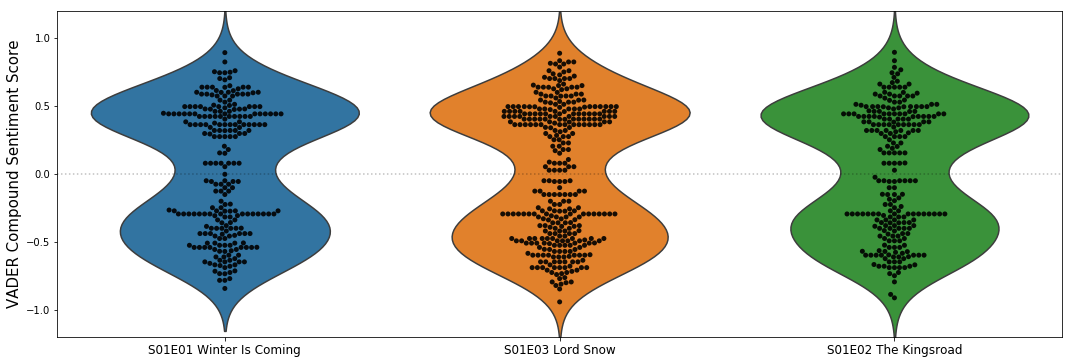

In [14]:
# Plot each episode
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[:3])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[:3])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_1.png')
plt.show()

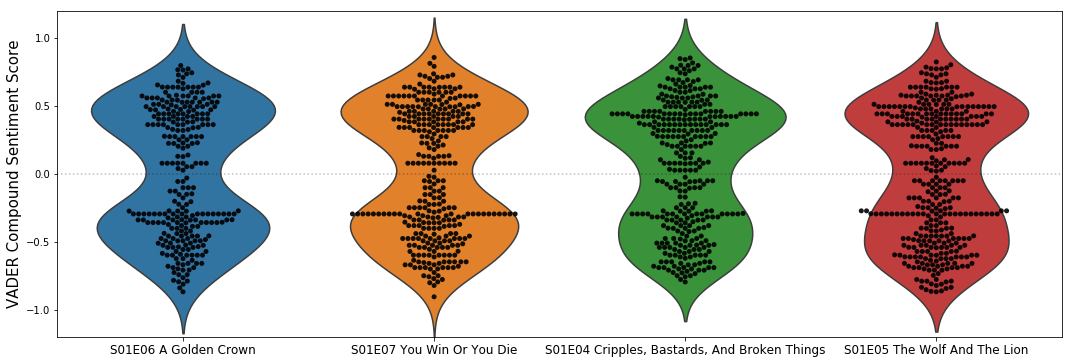

In [7]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[3:7])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[3:7])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_2.png')
plt.show()

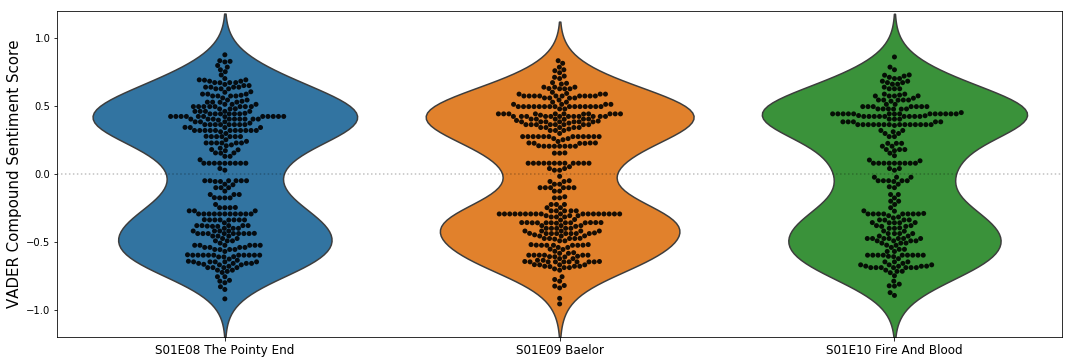

In [8]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[7:])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[7:])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Season1_3.png')
plt.show()

In [94]:
# Positive sentiments only mean df
positive_df = df[df["Positive?"]==True].groupby("EpNum")["Compound"].mean() #.sort_values(ascending=False)

# Negative sentiments only mean df
negative_df = df[df["Positive?"]==False].groupby("EpNum")["Compound"].mean() #.sort_values(ascending=True)

# All sentiments mean df
mean_df = df.groupby("EpNum")["Compound"].mean() #.sort_values(ascending=False)

colors = ["red", "gray", "yellow", "green", "gold", "black", "blue", "purple", "orange", "pink"]
edges = ["black", "black", "black", "black", "black", "black", "black", "black", "black", "black"]

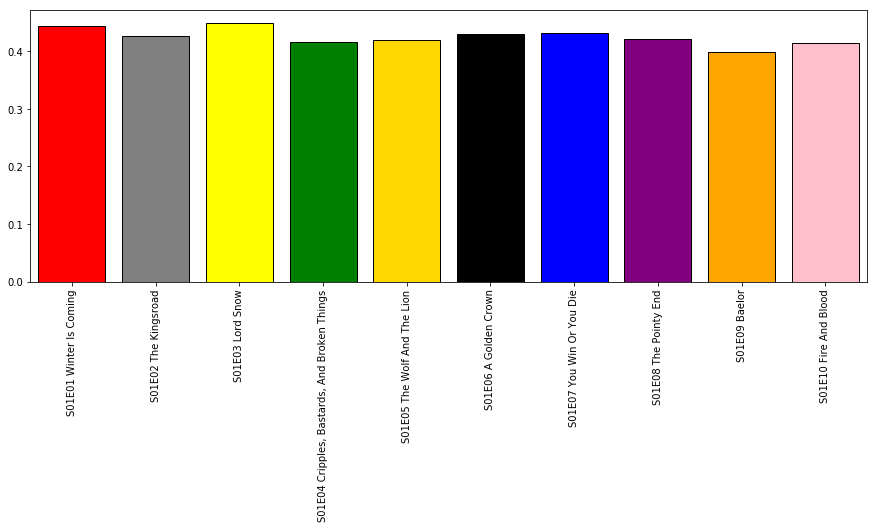

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
pos_rect = ax.bar(np.arange(len(positive_df)), positive_df, color=colors, edgecolor=edges)
ax.set_xticks(np.arange(len(positive_df)))
ax.set_xticklabels(positive_df.keys(), rotation = 90)
ax.set_xlim(-0.5, len(positive_df) - 0.5)

plt.show()

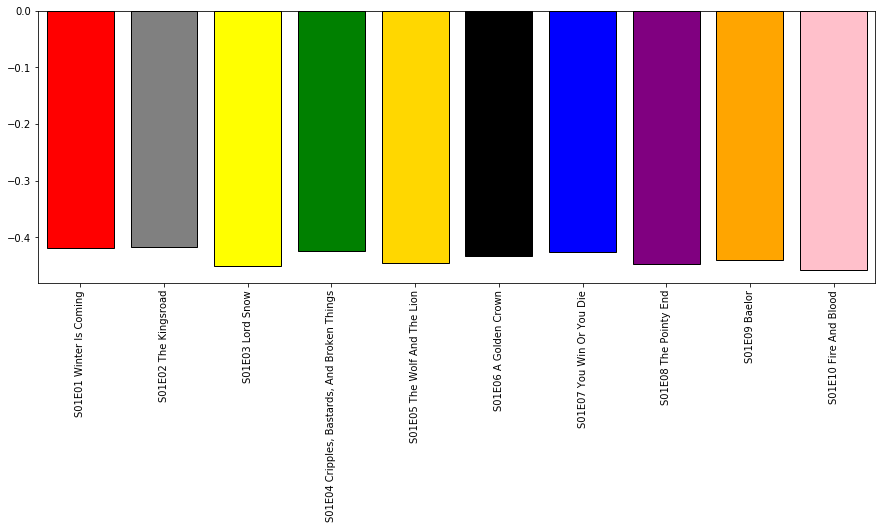

In [68]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 5))
neg_rect = ax.bar(np.arange(len(negative_df)), negative_df, color=colors, edgecolor=edges)
ax.set_xticks(np.arange(len(negative_df)))
ax.set_xticklabels(negative_df.keys(), rotation = 90)
ax.set_xlim(-0.5, len(positive_df) - 0.5)

plt.show()

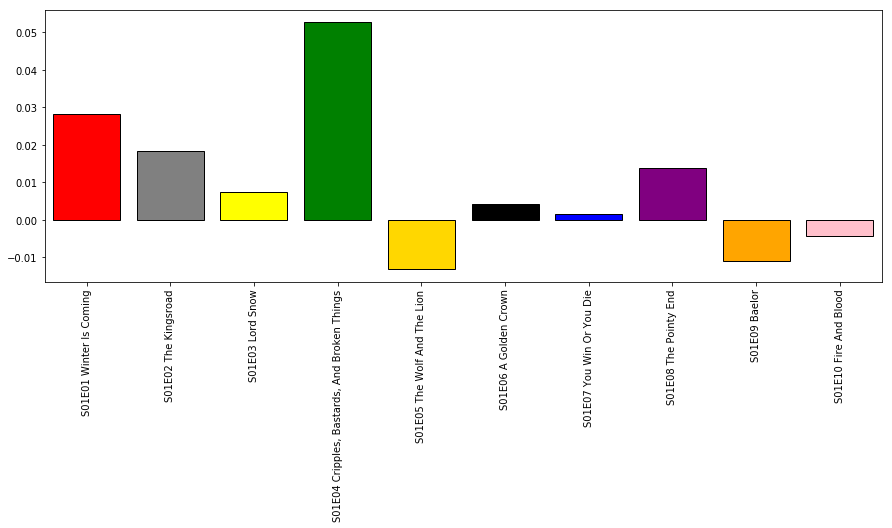

In [66]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 5))
mean_green_rect = ax.bar(np.arange(len(mean_df)), mean_df, color=colors, edgecolor=edges)
ax.set_xticks(np.arange(len(mean_df)))
ax.set_xticklabels(mean_df.keys(), rotation = 90)
ax.set_xlim(-0.5, len(positive_df) - 0.5)

plt.show()

In [125]:
transpose = pd.DataFrame(mean_df)
transpose = transpose.T
transpose

EpNum,S01E01,S01E02,S01E03,S01E04,S01E05,S01E06,S01E07,S01E08,S01E09,S01E10,...,S06E08,S06E09,S06E10,S07E01,S07E02,S07E03,S07E04,S07E05,S07E06,S07E07
Compound,0.028246,0.018374,0.007437,0.052766,-0.013251,0.004285,0.001448,0.013776,-0.010975,-0.004266,...,0.011191,-0.028281,-0.010962,-0.024092,0.004824,0.012058,-0.030174,0.005472,-0.037445,-0.100938


In [126]:
LastEpsDf = transpose[["S01E10", "S02E10", "S03E10", "S04E10", "S05E10", "S06E10", "S07E07", ]]
LastEpsDf = LastEpsDf.T
LastEpsDf = LastEpsDf.reset_index()
LastEpsDf

,EpNum,Compound
0,S01E10,-0.004266
1,S02E10,0.060293
2,S03E10,-0.018399
3,S04E10,-0.026534
4,S05E10,-0.080697
5,S06E10,-0.010962
6,S07E07,-0.100938


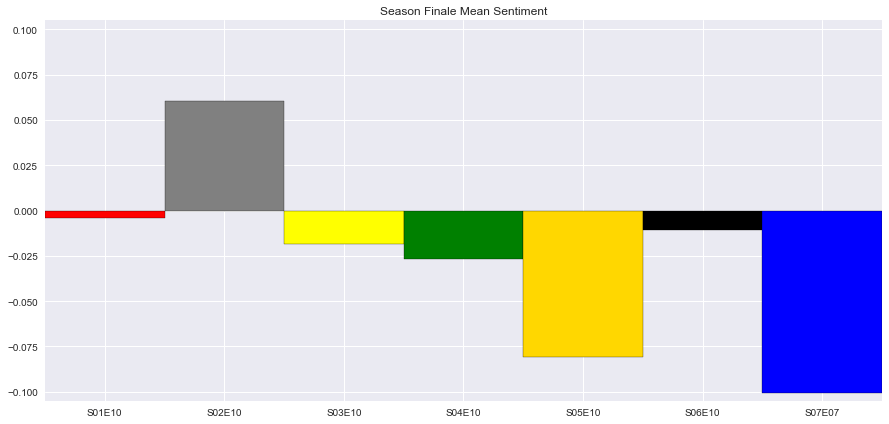

In [127]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(np.arange(len(LastEpsDf["Compound"])), LastEpsDf["Compound"], color=colors, edgecolor=edges, width=1)
ax.set_xticks(np.arange(len(LastEpsDf["Compound"])))
ax.set_xticklabels(LastEpsDf["EpNum"])
ax.set_xlim(-0.5, len(LastEpsDf["Compound"]) - 0.5)

plt.title("Season Finale Mean Sentiment")
plt.ylim(-0.105, 0.105)
sns.set()
plt.savefig("Images/FinaleSentiments.png")
plt.show()

In [128]:
FirstEpsDf = transpose[["S01E01", "S02E01", "S03E01", "S04E01", "S05E01", "S06E01", "S07E01", ]]
FirstEpsDf = FirstEpsDf.T
FirstEpsDf = FirstEpsDf.reset_index()
FirstEpsDf

,EpNum,Compound
0,S01E01,0.028246
1,S02E01,-0.024909
2,S03E01,0.044742
3,S04E01,0.040398
4,S05E01,0.041907
5,S06E01,0.001350
6,S07E01,-0.024092


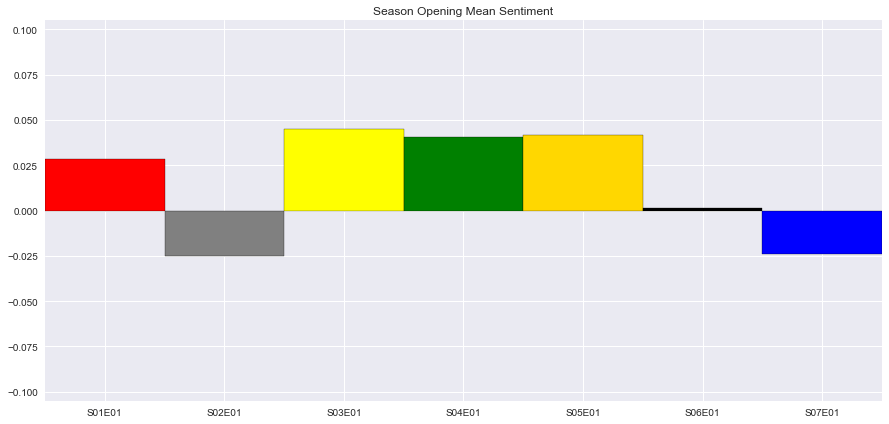

In [129]:
plt.close()
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(np.arange(len(FirstEpsDf["Compound"])), FirstEpsDf["Compound"], color=colors, edgecolor=edges, width=1)
ax.set_xticks(np.arange(len(FirstEpsDf["Compound"])))
ax.set_xticklabels(FirstEpsDf["EpNum"])
ax.set_xlim(-0.5, len(FirstEpsDf["Compound"]) - 0.5)

plt.title("Season Opening Mean Sentiment")
plt.ylim(-0.105, 0.105)
sns.set()
plt.savefig("Images/OpeningSentiments.png")
plt.show()

In [103]:
transpose = transpose.T.reset_index()

In [111]:
season = []
episode = []
for epnum in transpose["EpNum"]:
    season.append(epnum[1:3])
    episode.append(epnum[4:])
transpose["Ep"] = episode
transpose["Season"] = season
transpose.head(1)

,EpNum,Compound,Ep,Season
0,S01E01,0.028246,01,01


In [116]:
seasongroups = transpose.groupby(["Season", "Ep"])
grouped = seasongroups.mean()

In [130]:
grouped["Compound"][::10]

Season  Ep
01      01    0.028246
02      01   -0.024909
03      01    0.044742
04      01    0.040398
05      01    0.041907
06      01    0.001350
07      01   -0.024092
Name: Compound, dtype: float64

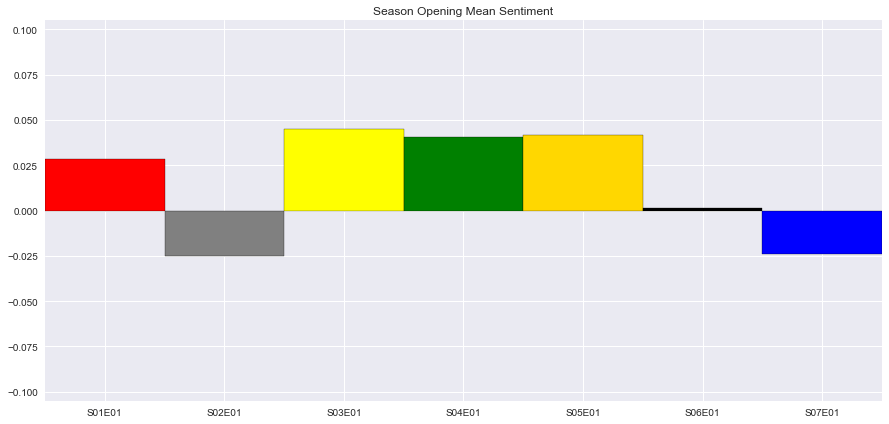

In [137]:
plt.close()
xticklabels = []
for x in range(7):
    xticklabels.append(f"S0{x+1}E01")
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(np.arange(len(grouped["Compound"][::10])), grouped["Compound"][::10], color=colors, edgecolor=edges, width=1)
ax.set_xticks(np.arange(len(grouped["Compound"][::10])))
ax.set_xticklabels(xticklabels)
ax.set_xlim(-0.5, len(grouped["Compound"][::10]) - 0.5)

plt.title("Season Opening Mean Sentiment")
plt.ylim(-0.105, 0.105)
sns.set()
plt.savefig("Images/OpeningSentiments2.png")
plt.show()

In [146]:
del eptitles[40]

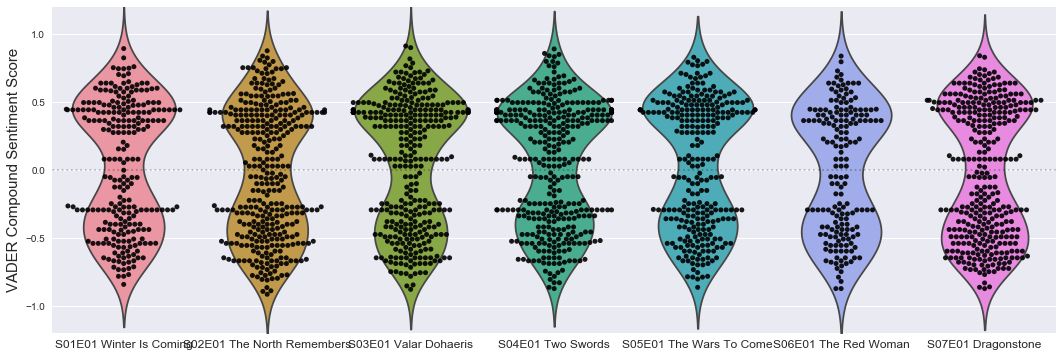

In [155]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[::10])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[::10])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Images/Openings.png')
plt.show()

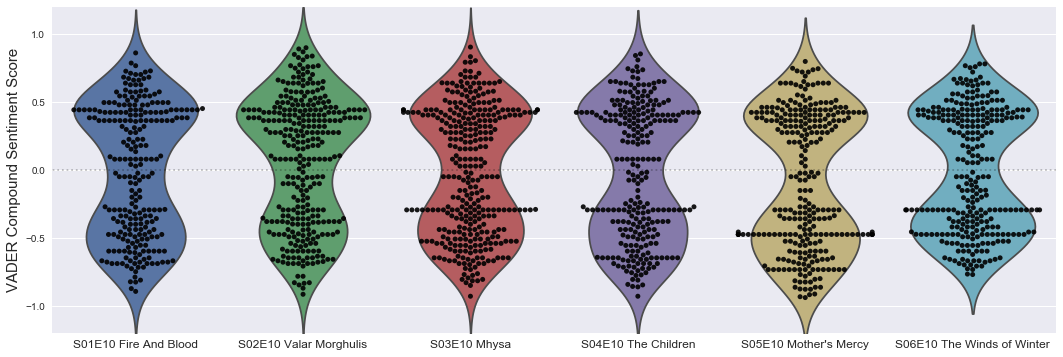

In [156]:
plt.close()
plt.figure(figsize=(18,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep'].isin(eptitles[9::10])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep'].isin(eptitles[9::10])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Images/Finales.png')
plt.show()

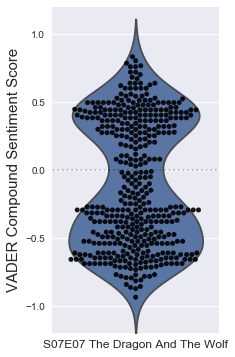

In [157]:
plt.close()
plt.figure(figsize=(3,6))
plt.ylim(-1.2,1.2)
sns.violinplot(x='Ep',y='Compound',data=df[df['Ep']==(eptitles[-1])],inner=None)
sns.swarmplot(x="Ep", y="Compound",data=df[df['Ep']==(eptitles[-1])], color="black", alpha=.9)
plt.hlines(0, -10, 10, alpha=.25, linestyle=":")
plt.xlabel('')
plt.xticks(size=12)
plt.ylabel('VADER Compound Sentiment Score',size=15)
plt.savefig('Images/Finales7.png')
plt.show()